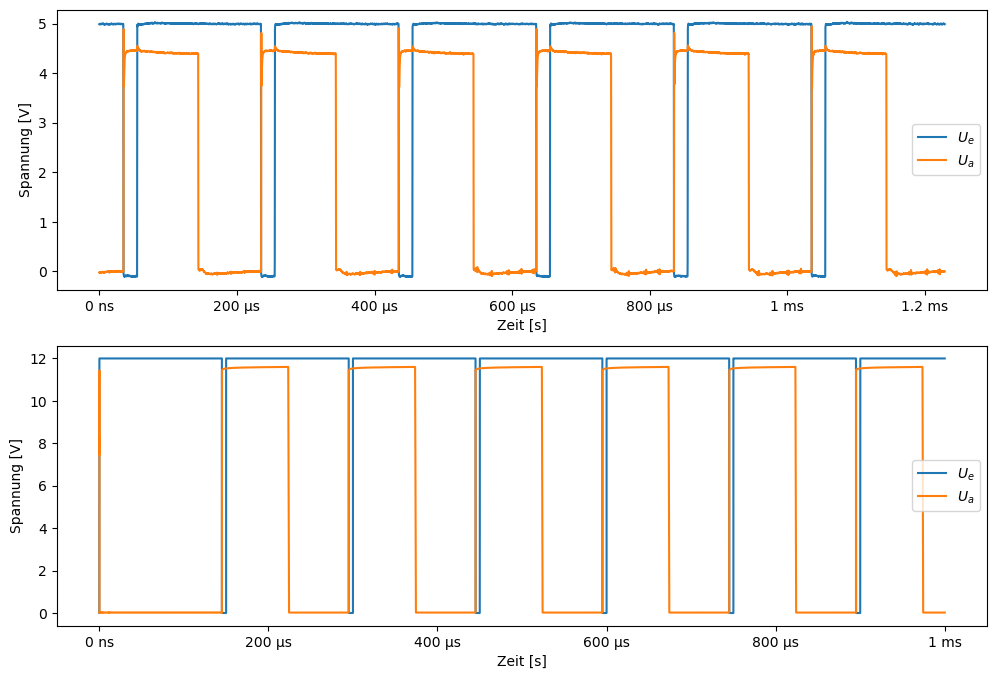

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
# Loading the data from the CSV file
df = pd.read_csv("Messwerte_Ne555_monoflop.csv", delimiter=',', comment='#',encoding = 'ISO-8859-1')
df2= pd.read_csv("ne555_monoflop.csv", delimiter=';')
# Helper functions for formatting labels
def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')


plt.figure(figsize=(12, 8))
plt.subplot(2, 1,1 )
plt.plot(df['Time (s)']-df['Time (s)'][0], df['Channel 1 (V)'],  label='$U_e$')
plt.plot(df['Time (s)']-df['Time (s)'][0], df['Channel 2 (V)'],label='$U_a$')
#plt.plot(df2['time'], df2['V(U_a)'], label='Simulation')
#plt.title('Messung')
plt.ylabel('Spannung [V]')
plt.xlabel('Zeit [s]')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.legend()
plt.subplot(2, 1,2)
plt.plot(df2['time'], df2['V(U_e)'], label='$U_e$')
plt.plot(df2['time'], df2['V(U_a)'], label='$U_a$')
#plt.title('Simulation')
plt.ylabel('Spannung [V]')
plt.xlabel('Zeit [s]')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_time))
plt.legend()
plt.savefig("monoflopsim.pdf")
plt.show()

